## Importing important libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Importing datasets

In [2]:
data1 = pd.read_csv('crime_data.csv',sep=',')
data1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Data understanding

In [3]:
data1.shape

(50, 5)

In [4]:
data1.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
data1.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [6]:
data1['Unnamed: 0'].nunique()

50

## Data Preparation

In [7]:
data1.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

## 1. Clustering 

### a. without normalization

In [8]:
X = data1.drop('Unnamed: 0',axis= 1)

In [9]:
k_means_model = KMeans(n_clusters=3)
k_means_model.fit(X)

KMeans(n_clusters=3)

In [10]:
y_pre = k_means_model.predict(X)

In [11]:
y_pre

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [12]:
wss =[]
for i in range(1,21):
    k_model = KMeans(n_clusters=i)
    k_model.fit(X)
    wss.append(k_model.inertia_)

C:\Users\namrata\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
wss

[355807.82159999997,
 96399.02814449919,
 47964.265357142845,
 34728.629357142854,
 24417.023523809516,
 18768.000666666674,
 15463.47377777778,
 13436.825531746035,
 11232.497365079367,
 10246.075142857144,
 9313.780817460318,
 8311.708809523807,
 7564.041976190475,
 6576.663999999996,
 5708.737333333332,
 5423.993333333331,
 4407.691500000002,
 4003.5053095238095,
 3808.0425000000005,
 3350.075666666666]

### b.with normalization 

In [14]:
scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [15]:
k_means_model1 = KMeans(n_clusters=3)
k_means_model1.fit(scaled_X)

KMeans(n_clusters=3)

In [16]:
y_pre1 = k_means_model1.predict(scaled_X)

In [17]:
y_pre1

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

In [24]:
wss_n =[]
for i in range(1,30):
    k_model1 = KMeans(n_clusters=i)
    k_model1.fit(scaled_X)
    wss_n.append(k_model1.inertia_)

C:\Users\namrata\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
wss_n

[200.0,
 104.96163315756873,
 80.08569526137276,
 57.55425863091106,
 50.4395137158558,
 43.71005161878415,
 40.70930746400885,
 36.33280365392066,
 30.758278605599443,
 28.311639397122555,
 24.291441897879974,
 22.976156521775728,
 21.697738776457623,
 19.61535073411101]

Text(0, 0.5, 'Distance WCSS')

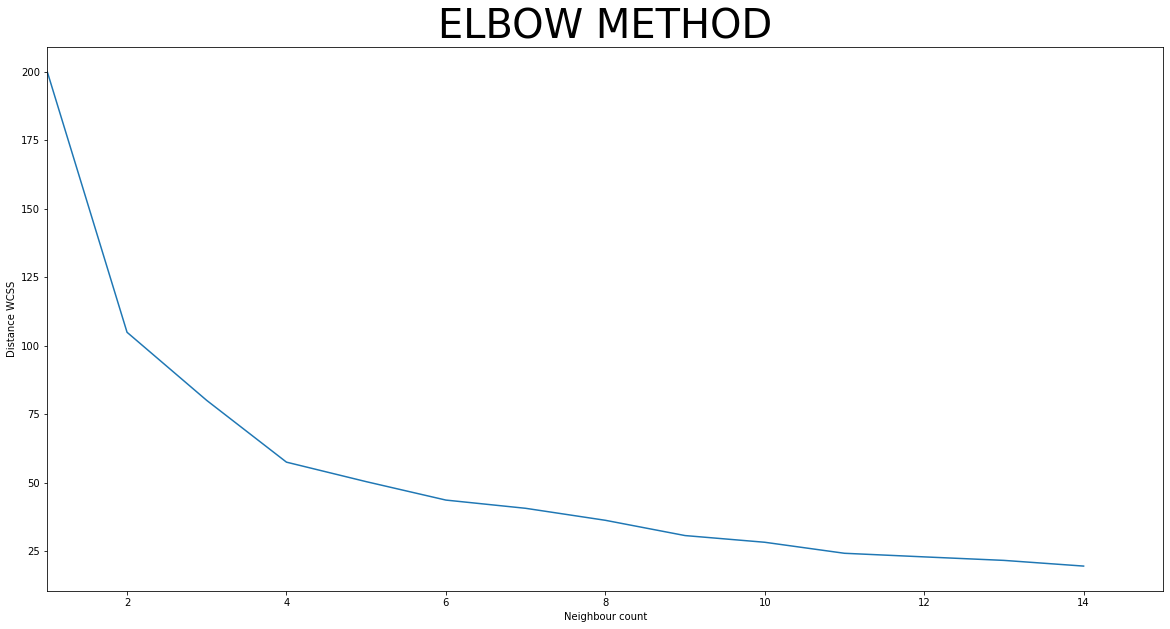

In [23]:
plt.figure(figsize=(20,10))
plt.plot(range(1,15),wss_n)
plt.title('ELBOW METHOD',size=40)
plt.xlim(1,15)
plt.xlabel('Neighbour count')
plt.ylabel('Distance WCSS')

Text(0, 0.5, 'Distance WCSS')

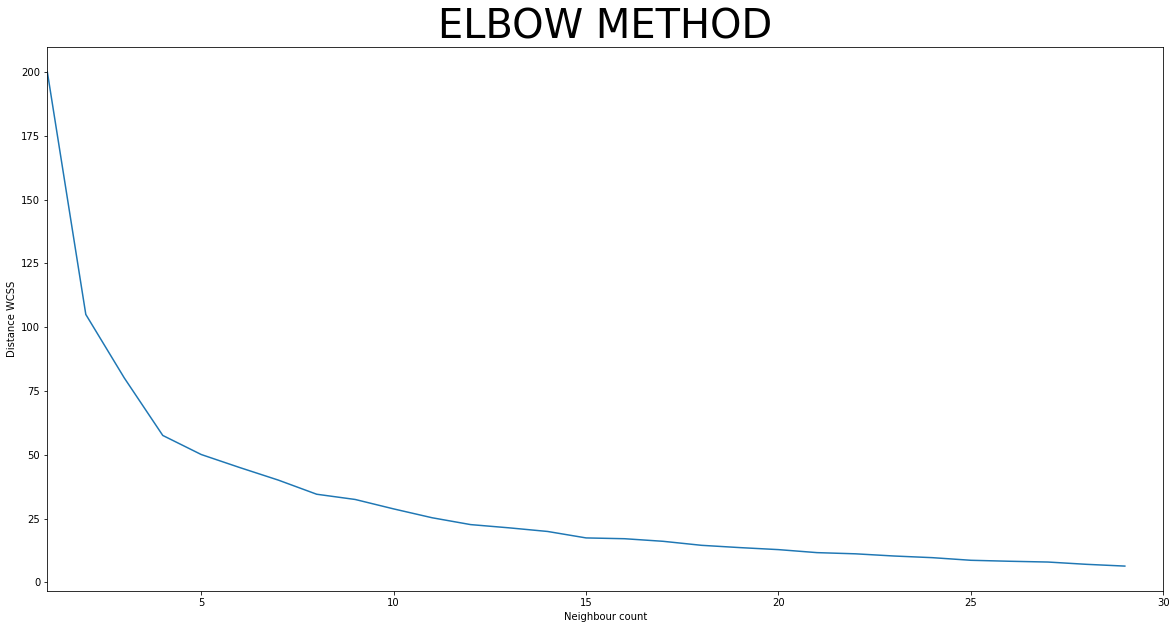

In [25]:
plt.figure(figsize=(20,10))
plt.plot(range(1,30),wss_n)
plt.title('ELBOW METHOD',size=40)
plt.xlim(1,30)
plt.xlabel('Neighbour count')
plt.ylabel('Distance WCSS')

In [ ]:
## We can see that after k=3,the rate of reduction of distance values is very less. Hence, the optimal value for k is 3

## Hierarical clustering 

In [26]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

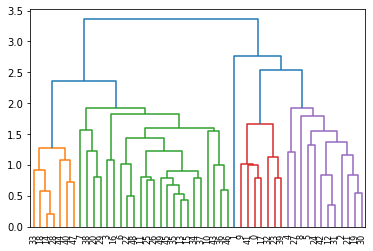

In [27]:
# creating dendogram
dendogram = sch.dendrogram(sch.linkage(scaled_X,method='average'))

In [46]:
# creating clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [47]:
y_hc = hc.fit_predict(scaled_X)
y_hc

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [49]:
data1['Clusters'] = Clusters

In [50]:
data1['Unnamed: 0'].nunique()

50

In [51]:
data1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [52]:
data1[data1['Clusters']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0


In [53]:
data1[data1['Clusters']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [56]:
data1[data1['Clusters']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
1,Alaska,10.0,263,48,44.5,2


In [55]:
data1[data1['Clusters']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


## DBSCAN

In [38]:
from sklearn.cluster import DBSCAN

In [64]:
# DBSCAN clustering 
dbs = DBSCAN(eps=2,min_samples=6)

In [65]:
dbs.fit(scaled_X)

DBSCAN(eps=2, min_samples=6)

In [66]:
# Noisy samples are given the labels -1
dbs.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [67]:
Cluster=pd.DataFrame(dbs.labels_,columns=['Clusters'])
Cluster

,Clusters
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [68]:
data1['Clusters'] = Cluster

In [69]:
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [70]:
## Second record is noisy. That is all the rows excpet for 'Alaska' are having similar properties will and can be clustered as 
## in a group. 